In [1]:
#Imports

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Processing

In [2]:
df = pd.read_csv("abalone.data", names=["sex", "length", "diameter", "height", "whole weight", "shucked weight",
                                       "viscera weight", "shell weight", "rings"])

df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Since our target is age, we must convert the rings column to age by adding 1.5 to every entry, since abalone show age similarly to trees.

In [3]:
df["age"] = df["rings"] + 1.5
df = df.drop(columns = "rings")

df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [4]:
sexArr = df["sex"].to_numpy()
numRows = len(sexArr)

sexMat = np.zeros((numRows, 3), dtype=int)
for i in range(numRows):
    char = sexArr[i]
    if char == 'M':
        sexMat[i][0] = 1
    elif char == 'F':
        sexMat[i][1] = 1
    else:
        sexMat[i][2] = 1

sexdf = pd.DataFrame(data = sexMat, columns = ["M", "F", "I"])

df = pd.concat([sexdf, df], axis = 1, sort = False)
df = df.drop(columns = "sex")

df.head()

,M,F,I,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
0,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   M               4177 non-null   int32  
 1   F               4177 non-null   int32  
 2   I               4177 non-null   int32  
 3   length          4177 non-null   float64
 4   diameter        4177 non-null   float64
 5   height          4177 non-null   float64
 6   whole weight    4177 non-null   float64
 7   shucked weight  4177 non-null   float64
 8   viscera weight  4177 non-null   float64
 9   shell weight    4177 non-null   float64
 10  age             4177 non-null   float64
dtypes: float64(8), int32(3)
memory usage: 310.1 KB


In [6]:
no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

No. of Rows: 4177
No. of Columns: 11


In [7]:
df = df.sample(frac=1)

y = df['age'].to_numpy()
X = df.drop(columns='age').to_numpy()

array([[<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'I'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'whole weight'}>,
        <AxesSubplot:title={'center':'shucked weight'}>,
        <AxesSubplot:title={'center':'viscera weight'}>],
       [<AxesSubplot:title={'center':'shell weight'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

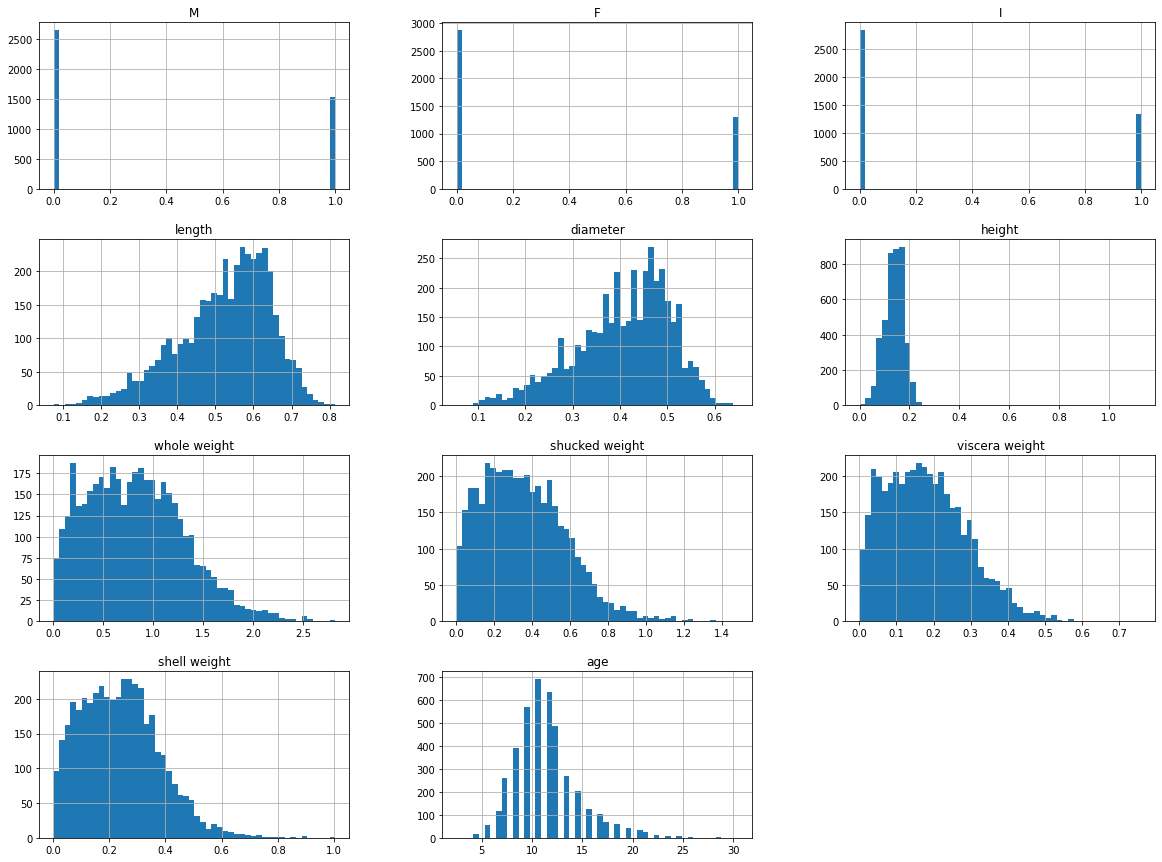

In [8]:
df.hist(bins=50, figsize=(20,15))

In [9]:
df.describe()

,M,F,I,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.365813,0.312904,0.321283,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.481715,0.463731,0.467025,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [10]:
df.corr()['age'].sort_values(ascending=False)

age               1.000000
shell weight      0.627574
diameter          0.574660
height            0.557467
length            0.556720
whole weight      0.540390
viscera weight    0.503819
shucked weight    0.420884
F                 0.250279
M                 0.181831
I                -0.436063
Name: age, dtype: float64

e:\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


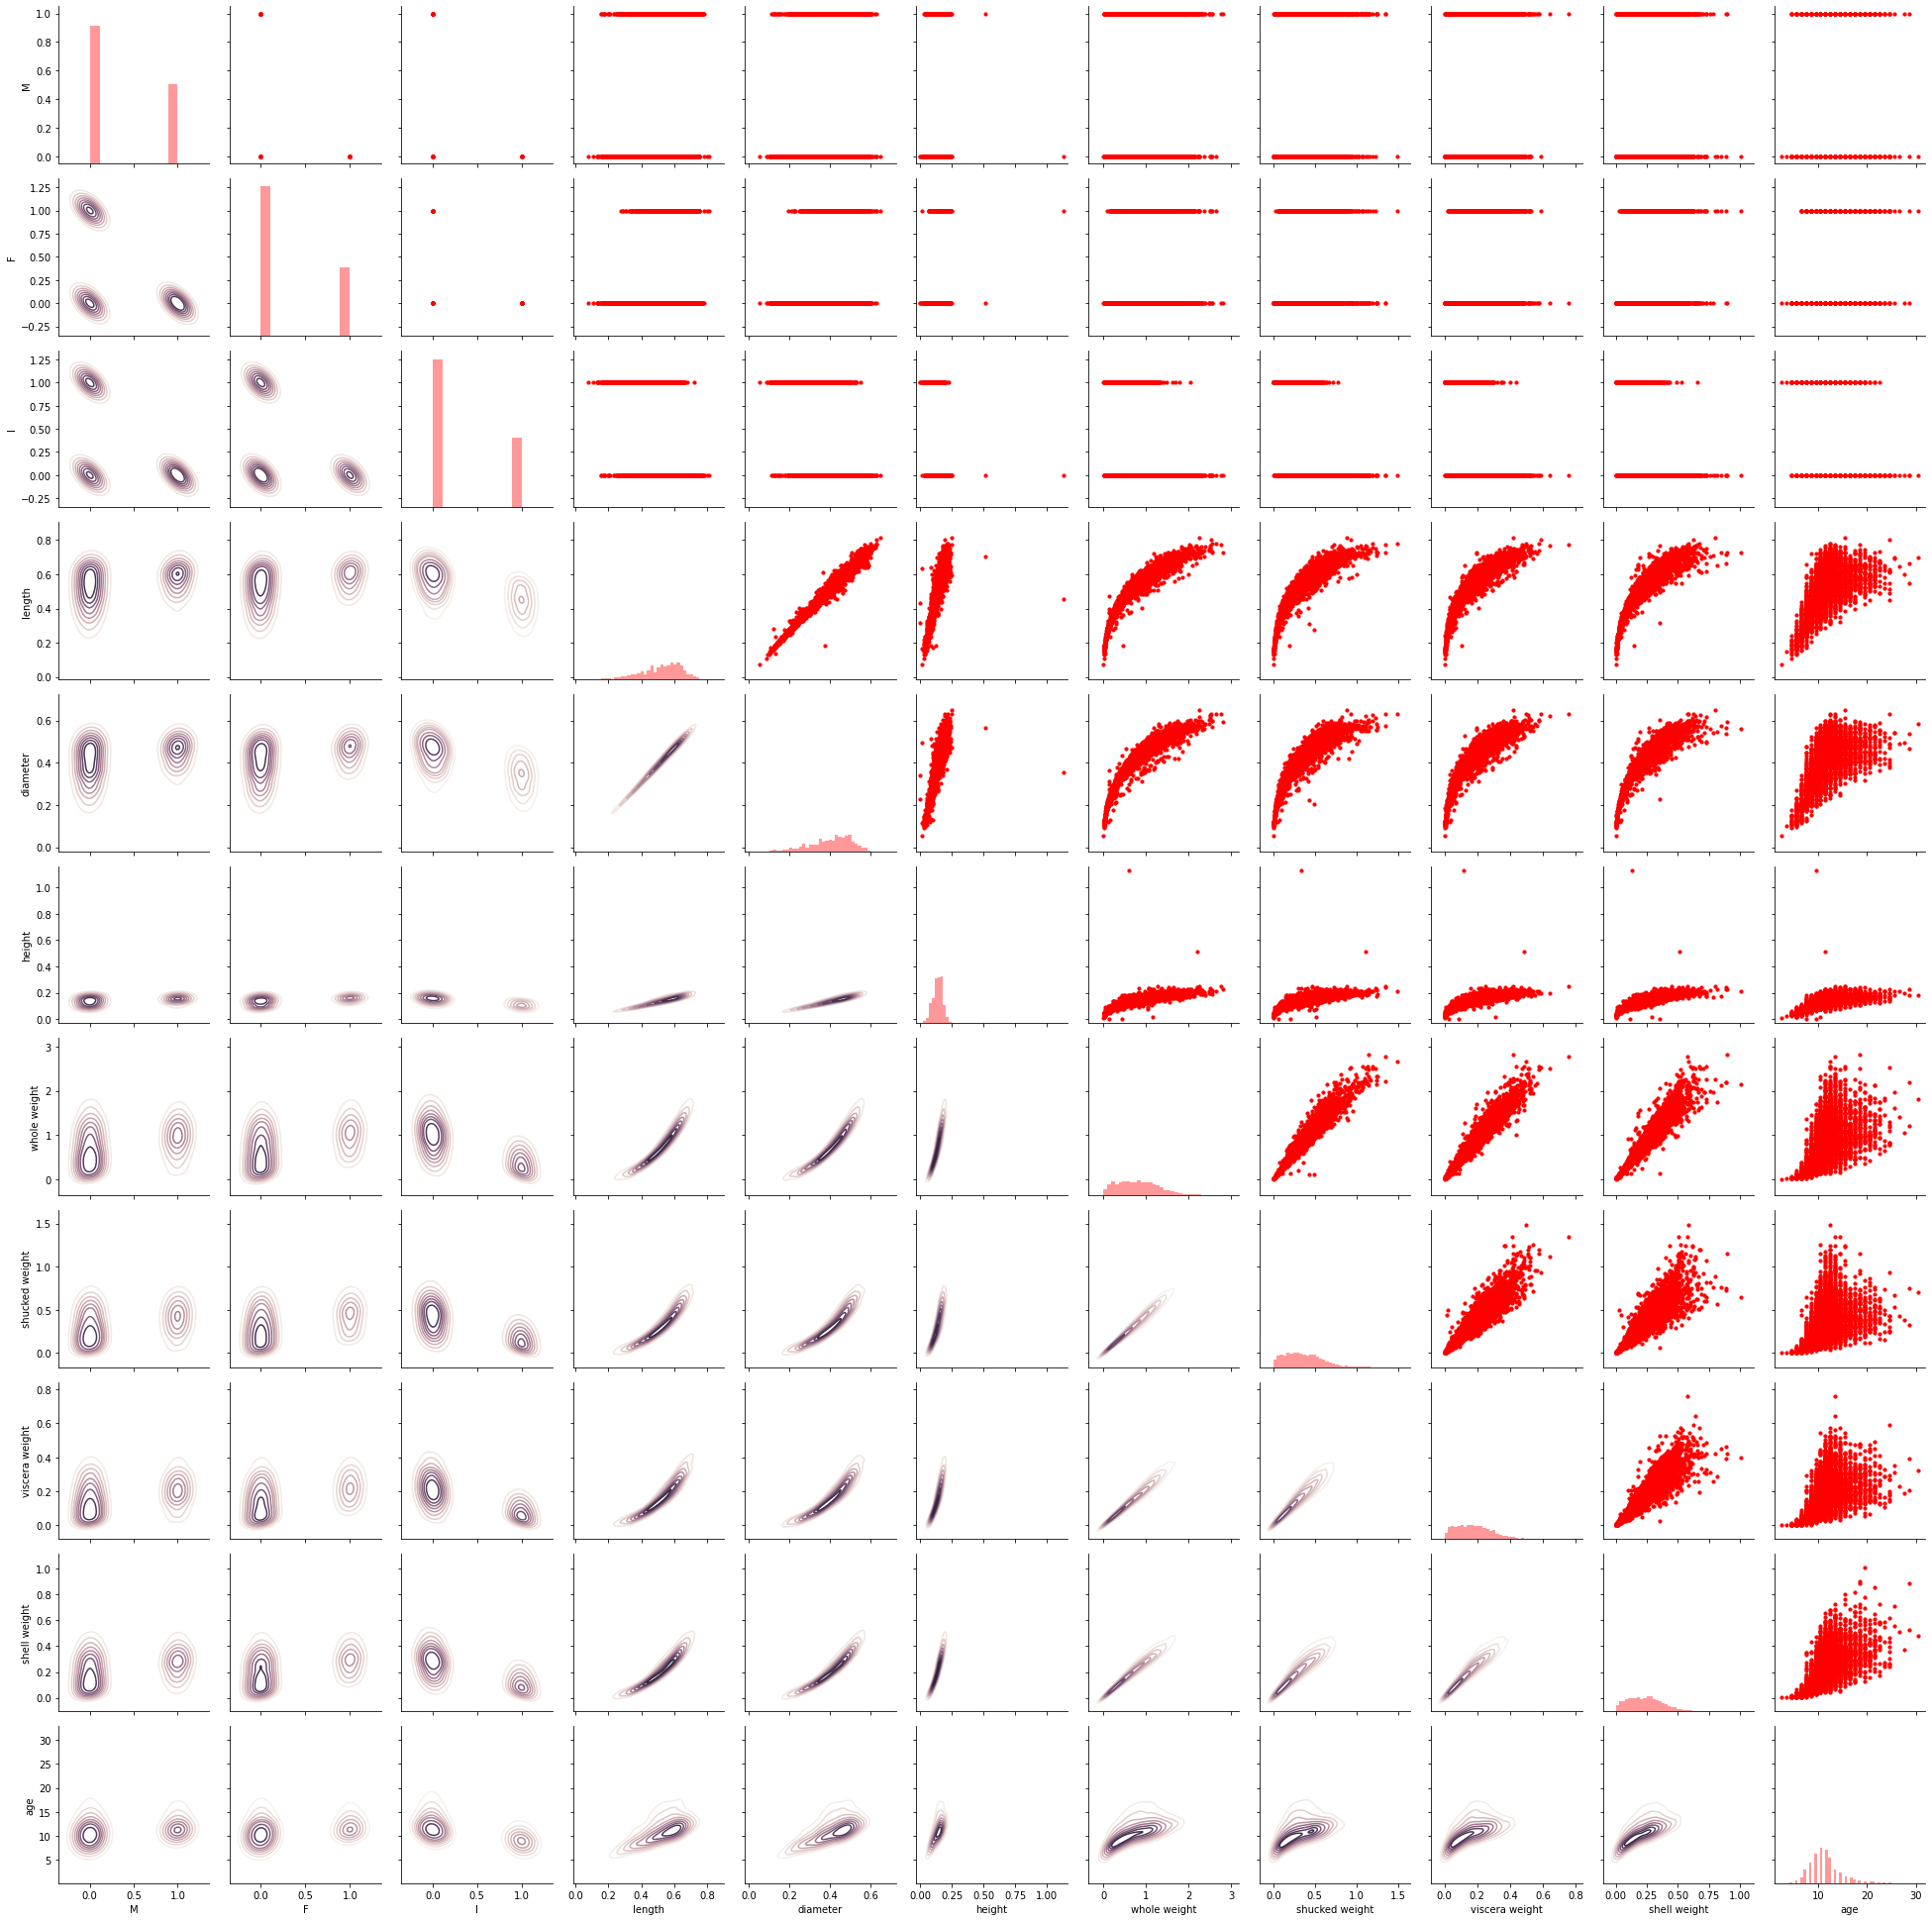

In [11]:
# Comment out to save time

'''
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

g = sns.PairGrid(df)

g.map_upper(plt.scatter, s=10, color = 'red')

g.map_diag(sns.distplot, kde=False, color = 'red')

g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);
'''

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
'''
param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal", "invscaling"], 
              'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],'eta0': [0.01, 0.001],
              'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
'''

param_grid = {'alpha': [0.01, 0.001, .00001], 'learning_rate': ["optimal"], 
              'l1_ratio': [1, 0.2, 0], 'max_iter':[400, 1000, 10000],'eta0': [0.001, .0001],
              'loss': ['squared_loss']}

sgd = SGDRegressor()

sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
sgd_cv.fit(X_train, y_train)


params_optimal_sgd = sgd_cv.best_params_

print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 525 out of 540 | elapsed:   33.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   33.2s finished


Best Score (negative mean squared error): -4.920938
Optimal Hyperparameter Values:  {'alpha': 0.001, 'eta0': 0.0001, 'l1_ratio': 1, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'max_iter': 400}




In [15]:
lin_reg_sgd = SGDRegressor(**params_optimal_sgd)

lin_reg_sgd.fit(X_train, y_train)

y_test_predicted = lin_reg_sgd.predict(X_test)

test_mse_polynomial = mean_squared_error(y_test, y_test_predicted)

print("Mean squared error: %.2f"
      % test_mse_polynomial)

# Explained variance score: 1 is perfect prediction

test_r2_polynomial = r2_score(y_test, y_test_predicted)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % test_r2_polynomial)

Mean squared error: 5.50
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.47
